dy= 0.6931471805599454
a_initial=  0.04606757659597117
Evolving from  1599568631804554.5  to  1.0 r_isco  with initial eccentricity 0.99999  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/imripy/src/imripy/inspiral.py:335: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/imripy/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:337: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/imripy/src/imripy/inspiral.py:172: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**(5./2.) / a**(7./2.)  / (1. - e**2)**2 * (1. + 7./8.*e**2)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:361: RuntimeWarning: invalid value encountered in sqrt
  retur

Required step size is less than spacing between numbers.
 -> Evolution took 3.1302s
Evolving from  1599568631804554.5  to  1.0 r_isco  with initial eccentricity 0.9999873361982653  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.3089s
Evolving from  1599568631804554.5  to  1.0 r_isco  with initial eccentricity 0.9999839628125625  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 2.9875s
Evolving from  1599568631804554.5  to  1.0 r_isco  with initial eccentricity 0.9999796908237909  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.2056s
Evolving from  1599568631804554.5  to  1.0 r_isco  with initial eccentricity 0.9999742808619094  with  Option

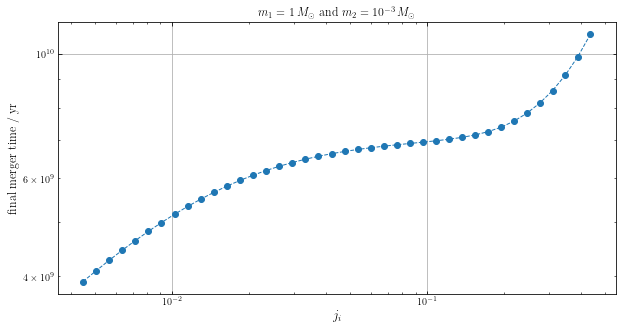

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import imripy
from imripy import merger_system as ms
from scipy.interpolate import interp1d
from matplotlib.ticker import FormatStrFormatter
from scipy.optimize import curve_fit
from numpy import diff

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})

π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of yr
M_solar = 1.989e30


# Definition of the binary system 


m_1 = 1e-3   #in units of M☉
m_2 = 2*m_1   #in units of M☉

y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy  = (y_2 - y_1)

print("dy=",dy)

y_list = np.zeros(20)
m_1_list = np.zeros(len(y_list))
m_2_list = np.zeros(len(y_list))

for i in range(len(y_list)):
    m_1_list[i] = m_2_list[i] = (m_1 + ((i/4)*np.exp(dy)))

Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, m_1 in enumerate(m_1_list):
    Δ_1_list[i] =  Δ_2_list[i] = np.exp(m_1 + 0.5*dy) - np.exp(m_1 - 0.5*dy)
     

    

    
def a(m_1,m_2,Δ_1,Δ_2):  # for x = x_bar 
    
    f_pbh = 4.3e-3
    f = 0.85 * f_pbh
        
          
    def P(m): #Powerlaw PBH mass distribution
        α = 2.6
        M = 1e-4     #in units of M☉
        return ((α-1)/M) * ((m/M)**(-α))

    
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3*(m_1+m_2))/(8*π*ρ_eq*f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2)))**(1/3))
   
    def λ(m_1,m_2,Δ_1,Δ_2):
        return (8*π*ρ_eq*(x̄(m_1,m_2,Δ_1,Δ_2)**3))/(3*(m_1 + m_2))

    
    return ( 0.0977*λ(m_1,m_2,Δ_1,Δ_2) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2)**2) ) * x̄(m_1,m_2,Δ_1,Δ_2)





a_initial = a(m_1_list[2], m_2_list[0], Δ_1_list[2], Δ_2_list[0])


print("a_initial= ", a_initial)


# Setting initial and final conditions of the binary evolution for an eccentric orbit
a_i_ref = a_initial * 1e4
e0_array = 1- np.geomspace(1e-5, 0.1, 40) 
e0_list = e0_array.tolist()
a_fin = sp.r_isco()      # Choosen equal to r_icso
R_fin = sp.r_isco()      # The final condition for the evolution





plt.figure(figsize = (10, 5))
plt.rc('lines', linewidth=1)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)





j0_ref_list = np.zeros(len(e0_list))
tm_ref_list = np.zeros(len(e0_list))


for k, e0 in enumerate (e0_list):
    m_bar = 1
    m1 =  m_bar * ms.solar_mass_to_pc  
    m2 = 1e-3 * ms.solar_mass_to_pc   
    D_luminosity = 5e8              
    ρ_bar = (ρ_eq/2) * (t_eq**(3/2)) * ((2 * G * m_bar)**(3/4))   
    r_spike = 1  # in parsecs, Choosen by choice
    alpha = 9/4
    rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc  
    spike = imripy.halo.Spike(rho_spike, r_spike, alpha)
    sp = ms.SystemProp(m1, m2, spike, D_luminosity)   
    ev_ecc = imripy.inspiral.Classic.Evolve(sp, a_i_ref , e0,  a_fin = R_fin)
    tm_ref_list[k] = ev_ecc.t[-1]/ms.year_to_pc
    j0_ref_list[k] = np.sqrt(1 - (e0**2))
    
plt.loglog(j0_ref_list, tm_ref_list, '--o')
    



    

plt.xlabel('$j_{i}$', fontsize = 13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('$m_{1} = 1 \, M_{\odot}$ and $m_{2}= 10^{-3} \,  M_{\odot}$ ')
plt.grid()
plt.show()

In [32]:
from scipy.interpolate import InterpolatedUnivariateSpline

def f_tm_of_j0(j0, a0, m1, m2):
    beta = 0.75
    gamma  =  0.65
    delta = -0.89
    a_i_ref = (1e4 * 0.04606)   # in units of pc
    m1_ref = 1      # in units of solar mass.
    m2_ref = 1e-3   # in units of solar mass.
    spl =  InterpolatedUnivariateSpline(j0_ref_list, tm_ref_list, ext = 2)
    return spl(j0) * ((a0/a_i_ref)**(beta)) * ((m1 /m1_ref)**(gamma)) * ((m2 /m2_ref)**(delta))


dy= 0.6931471805599436
Evolving from  408089321326120.8  to  1.0 r_isco  with initial eccentricity 0.99999  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/imripy/src/imripy/inspiral.py:335: RuntimeWarning: invalid value encountered in sqrt
  v_s = np.sqrt(sp.m_total(a) *(2./r - 1./a))
/home/pratibhajangra/imripy/src/imripy/halo.py:321: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(r > self.r_min, self.rho_spike * (self.r_spike/r)**self.alpha, 0.)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:337: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/imripy/src/imripy/inspiral.py:172: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**(5./2.) / a**(7./2.)  / (1. - e**2)**2 * (1. + 7./8.*e**2)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:361: RuntimeWarning: invalid value encountered in sqrt
  retur

Required step size is less than spacing between numbers.
 -> Evolution took 3.0019s
Evolving from  408089321326120.8  to  1.0 r_isco  with initial eccentricity 0.9999873361982653  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.1401s
Evolving from  408089321326120.8  to  1.0 r_isco  with initial eccentricity 0.9999839628125625  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 2.8783s
Evolving from  408089321326120.8  to  1.0 r_isco  with initial eccentricity 0.9999796908237909  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08


/home/pratibhajangra/imripy/src/imripy/inspiral.py:153: RuntimeWarning: invalid value encountered in double_scalars
  return -32./5. * sp.m_reduced(a)**2 * sp.m_total(a)**3 / a**5  / (1. - e**2)**(7./2.) * (1. + 73./24. * e**2 + 37./96. * e**4)
/home/pratibhajangra/imripy/src/imripy/inspiral.py:337: RuntimeWarning: invalid value encountered in double_scalars
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/home/pratibhajangra/imripy/src/imripy/inspiral.py:361: RuntimeWarning: invalid value encountered in double_scalars
  return -(1.-e**2)**(3./2.)/2./np.pi *np.sqrt(sp.m_total(a) * a*(1.-e**2)) *  quad(integrand, 0., 2.*np.pi, limit = 100)[0]


Required step size is less than spacing between numbers.
 -> Evolution took 3.1854s
Evolving from  408089321326120.8  to  1.0 r_isco  with initial eccentricity 0.9999742808619094  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.0463s
Evolving from  408089321326120.8  to  1.0 r_isco  with initial eccentricity 0.9999674297934434  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.0100s
Evolving from  408089321326120.8  to  1.0 r_isco  with initial eccentricity 0.9999587537361709  with  Options: accretion = False, haloPhaseSpaceDescription = False, accuracy = 1.0e-08
Required step size is less than spacing between numbers.
 -> Evolution took 3.0340s
Evolving from  408089321326120.8  to  1.0 r_isco  with initial eccentricity 0.9999477665492573  with  Options: a

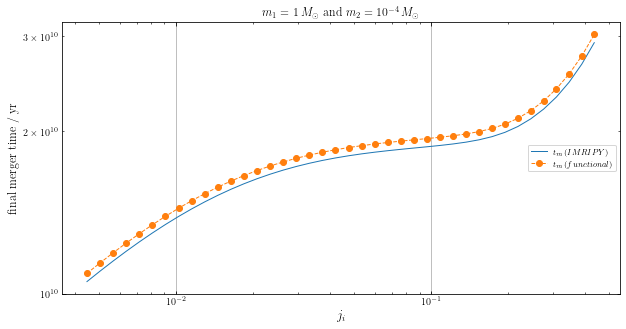

In [36]:
m_1 = 1e-4   #in units of M☉
m_2 = 2*m_1   #in units of M☉

y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy  = (y_2 - y_1)

print("dy=",dy)

y_list = np.zeros(20)
m_1_list = np.zeros(len(y_list))
m_2_list = np.zeros(len(y_list))


for i in range(len(y_list)):
    m_1_list[i] = m_2_list[i] = (m_1 + ((i/4)*np.exp(dy)))
    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, m_1 in enumerate(m_1_list):
    Δ_1_list[i] =  Δ_2_list[i] = np.exp(m_1 + 0.5*dy) - np.exp(m_1 - 0.5*dy)
     


        
def a(m_1,m_2,Δ_1,Δ_2):  # for x =  x_bar 
    
    f_pbh = 4.3e-3
    f = 0.85 * f_pbh
        
    def P(m): #Powerlaw PBH mass distribution
        α = 2.6
        M = 1e-4     #in units of M☉
        return ((α-1)/M) * ((m/M)**(-α))

    
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3*(m_1+m_2))/(8*π*ρ_eq*f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2)))**(1/3))
   
    def λ(m_1,m_2,Δ_1,Δ_2):
        return (8*π*ρ_eq*(x̄(m_1,m_2,Δ_1,Δ_2)**3))/(3*(m_1 + m_2))

    
    return ( 0.0977*λ(m_1,m_2,Δ_1,Δ_2) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2)**2) ) * x̄(m_1,m_2,Δ_1,Δ_2)


a_i = a(m_1_list[2], m_2_list[0], Δ_1_list[2], Δ_2_list[0])



# Setting initial and final conditions of the binary evolution for an eccentric orbit


plt.figure(figsize = (10, 5))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)


t_m_list = np.zeros(len(e0_list))
t_m1_list = np.zeros(len(e0_list))
j0_list = np.zeros(len(e0_list))


e0_array = 1- np.geomspace(1e-5, 0.1, 40) 
e0_list = e0_array.tolist()

for k, e0 in enumerate (e0_list): 
    m_bar = 1
    m1 =  m_bar * ms.solar_mass_to_pc      
    m2 = 1e-4 * ms.solar_mass_to_pc        
    D_luminosity = 5e8                     
    ρ_bar = (ρ_eq/2) * (t_eq**(3/2)) * ((2 * G * m_bar)**(3/4))
    r_spike = 1                            # in parsecs, Choosen by choice
    alpha = 9/4
    rho_spike =  ρ_bar * (r_spike**(-alpha)) * ms.solar_mass_to_pc              # This takes the value of M_sun/pc^3 and converts it to 1/pc^2
    spike = imripy.halo.Spike(rho_spike, r_spike, alpha)
    sp = ms.SystemProp(m1, m2, spike, D_luminosity)
    a0 = 1e7 * a_i
    a_fin = sp.r_isco()      # Choosen equal to r_icso
    R_fin = sp.r_isco()      # The final condition for the evolution
    ev_ecc = imripy.inspiral.Classic.Evolve(sp, a0 , e0,  a_fin = R_fin)
    t_m_list[k] =  ev_ecc.t[-1]/ms.year_to_pc
    j0_list[k]  =  np.sqrt(1 - (e0**2))
    t_m1_list[k] = f_tm_of_j0(j0_list[k] , a0,  1, 1e-4)
plt.loglog(j0_list, t_m_list, '')
plt.loglog(j0_list, t_m1_list, '--o')
    
    
plt.legend([ "$t_{m} \, (IMRIPY)$","$t_{m} \, (functional)$"], loc = 'center right', prop = {"size":8})
plt.xlabel('$j_{i}$', fontsize = 13)
plt.ylabel('final merger time / yr', fontsize = 12)
plt.title('$m_{1} = 1 \, M_{\odot}$ and $m_{2}= 10^{-4} \, M_{\odot}$ ')
plt.grid()
plt.savefig('2t_m_check.pdf')
plt.show()